# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

## Tesla

In [19]:

print(df_tesla.shape)
print(df_tesla.columns)
df_tesla.head()

(124, 3)
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [20]:
print(f"Tesla Web searched, maximum: {df_tesla.TSLA_WEB_SEARCH.max()}")
print(f"Tesla Web Searched, minimium: {df_tesla.TSLA_WEB_SEARCH.min()}")
df_tesla.describe()

Tesla Web searched, maximum: 31
Tesla Web Searched, minimium: 2


,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


## Bitcoin Search and Price

In [21]:
# for Bitcoin Search Trend
print(df_btc_search.shape)
print(df_btc_search.columns)
df_btc_search.head()

(73, 2)
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [22]:
print(f"Bitcoin News Search maximum per month: {df_btc_search.BTC_NEWS_SEARCH.max()}")
print(f"Bitcoin New Search minimum per month: {df_btc_search.BTC_NEWS_SEARCH.min()}")
df_btc_search.describe()

Bitcoin News Search maximum per month: 100
Bitcoin New Search minimum per month: 3


,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [8]:
# for bitcoin price 

print(df_btc_price.shape)
print(df_btc_price.columns)
df_btc_price.head()

(2204, 3)
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [23]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [24]:
# for unemployment data
print(df_unemployment.shape)
print(df_unemployment.columns)
df_unemployment.head()

(181, 3)
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [26]:
print(f"largest Benefits Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}")
df_unemployment.describe()

largest Benefits Web Search: 100


,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


# Data Cleaning

### Check for missing values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [30]:
print(f"Is there any missing values in df_tesla: {df_tesla.isna().to_numpy().any()}")
print(f"Is there any missing values in bitcoin price: {df_btc_price.isna().to_numpy().any()}")
print(f"Is there any missing values in bitcoin search: {df_btc_search.isna().to_numpy().any()}")
print(f"Is there any missing values in unemployment data: {df_unemployment.isna().to_numpy().any()}")

Is there any missing values in df_tesla: False
Is there any missing values in bitcoin price: True
Is there any missing values in bitcoin search: False
Is there any missing values in unemployment data: False


So there are missing values in bitcoin price data<br>
Finding out how many missing values are there

In [31]:
print(f"Amount of missing data in Bitcoin price data: {df_btc_price.isna().to_numpy().sum()}")

Amount of missing data in Bitcoin price data: 2


#### So there are only 2 missing data

In [38]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


#### Most probably last month results are not up yet, so we can drop this columns

In [42]:
df_btc_price.dropna(inplace=True)
df_btc_price.isna().to_numpy().any()

False

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [44]:
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [46]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_tesla.dtypes

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

In [49]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_price.dtypes

DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object

In [51]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_search.dtypes

MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

In [54]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_unemployment.dtypes

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [59]:
df_btc_price_monthly = df_btc_price.resample("M", on="DATE").last()

In [62]:
print(df_btc_price_monthly.shape)
print(df_btc_search.shape)
df_btc_price_monthly.head()

(73, 2)
(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook formatting and Style helpers

In [63]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

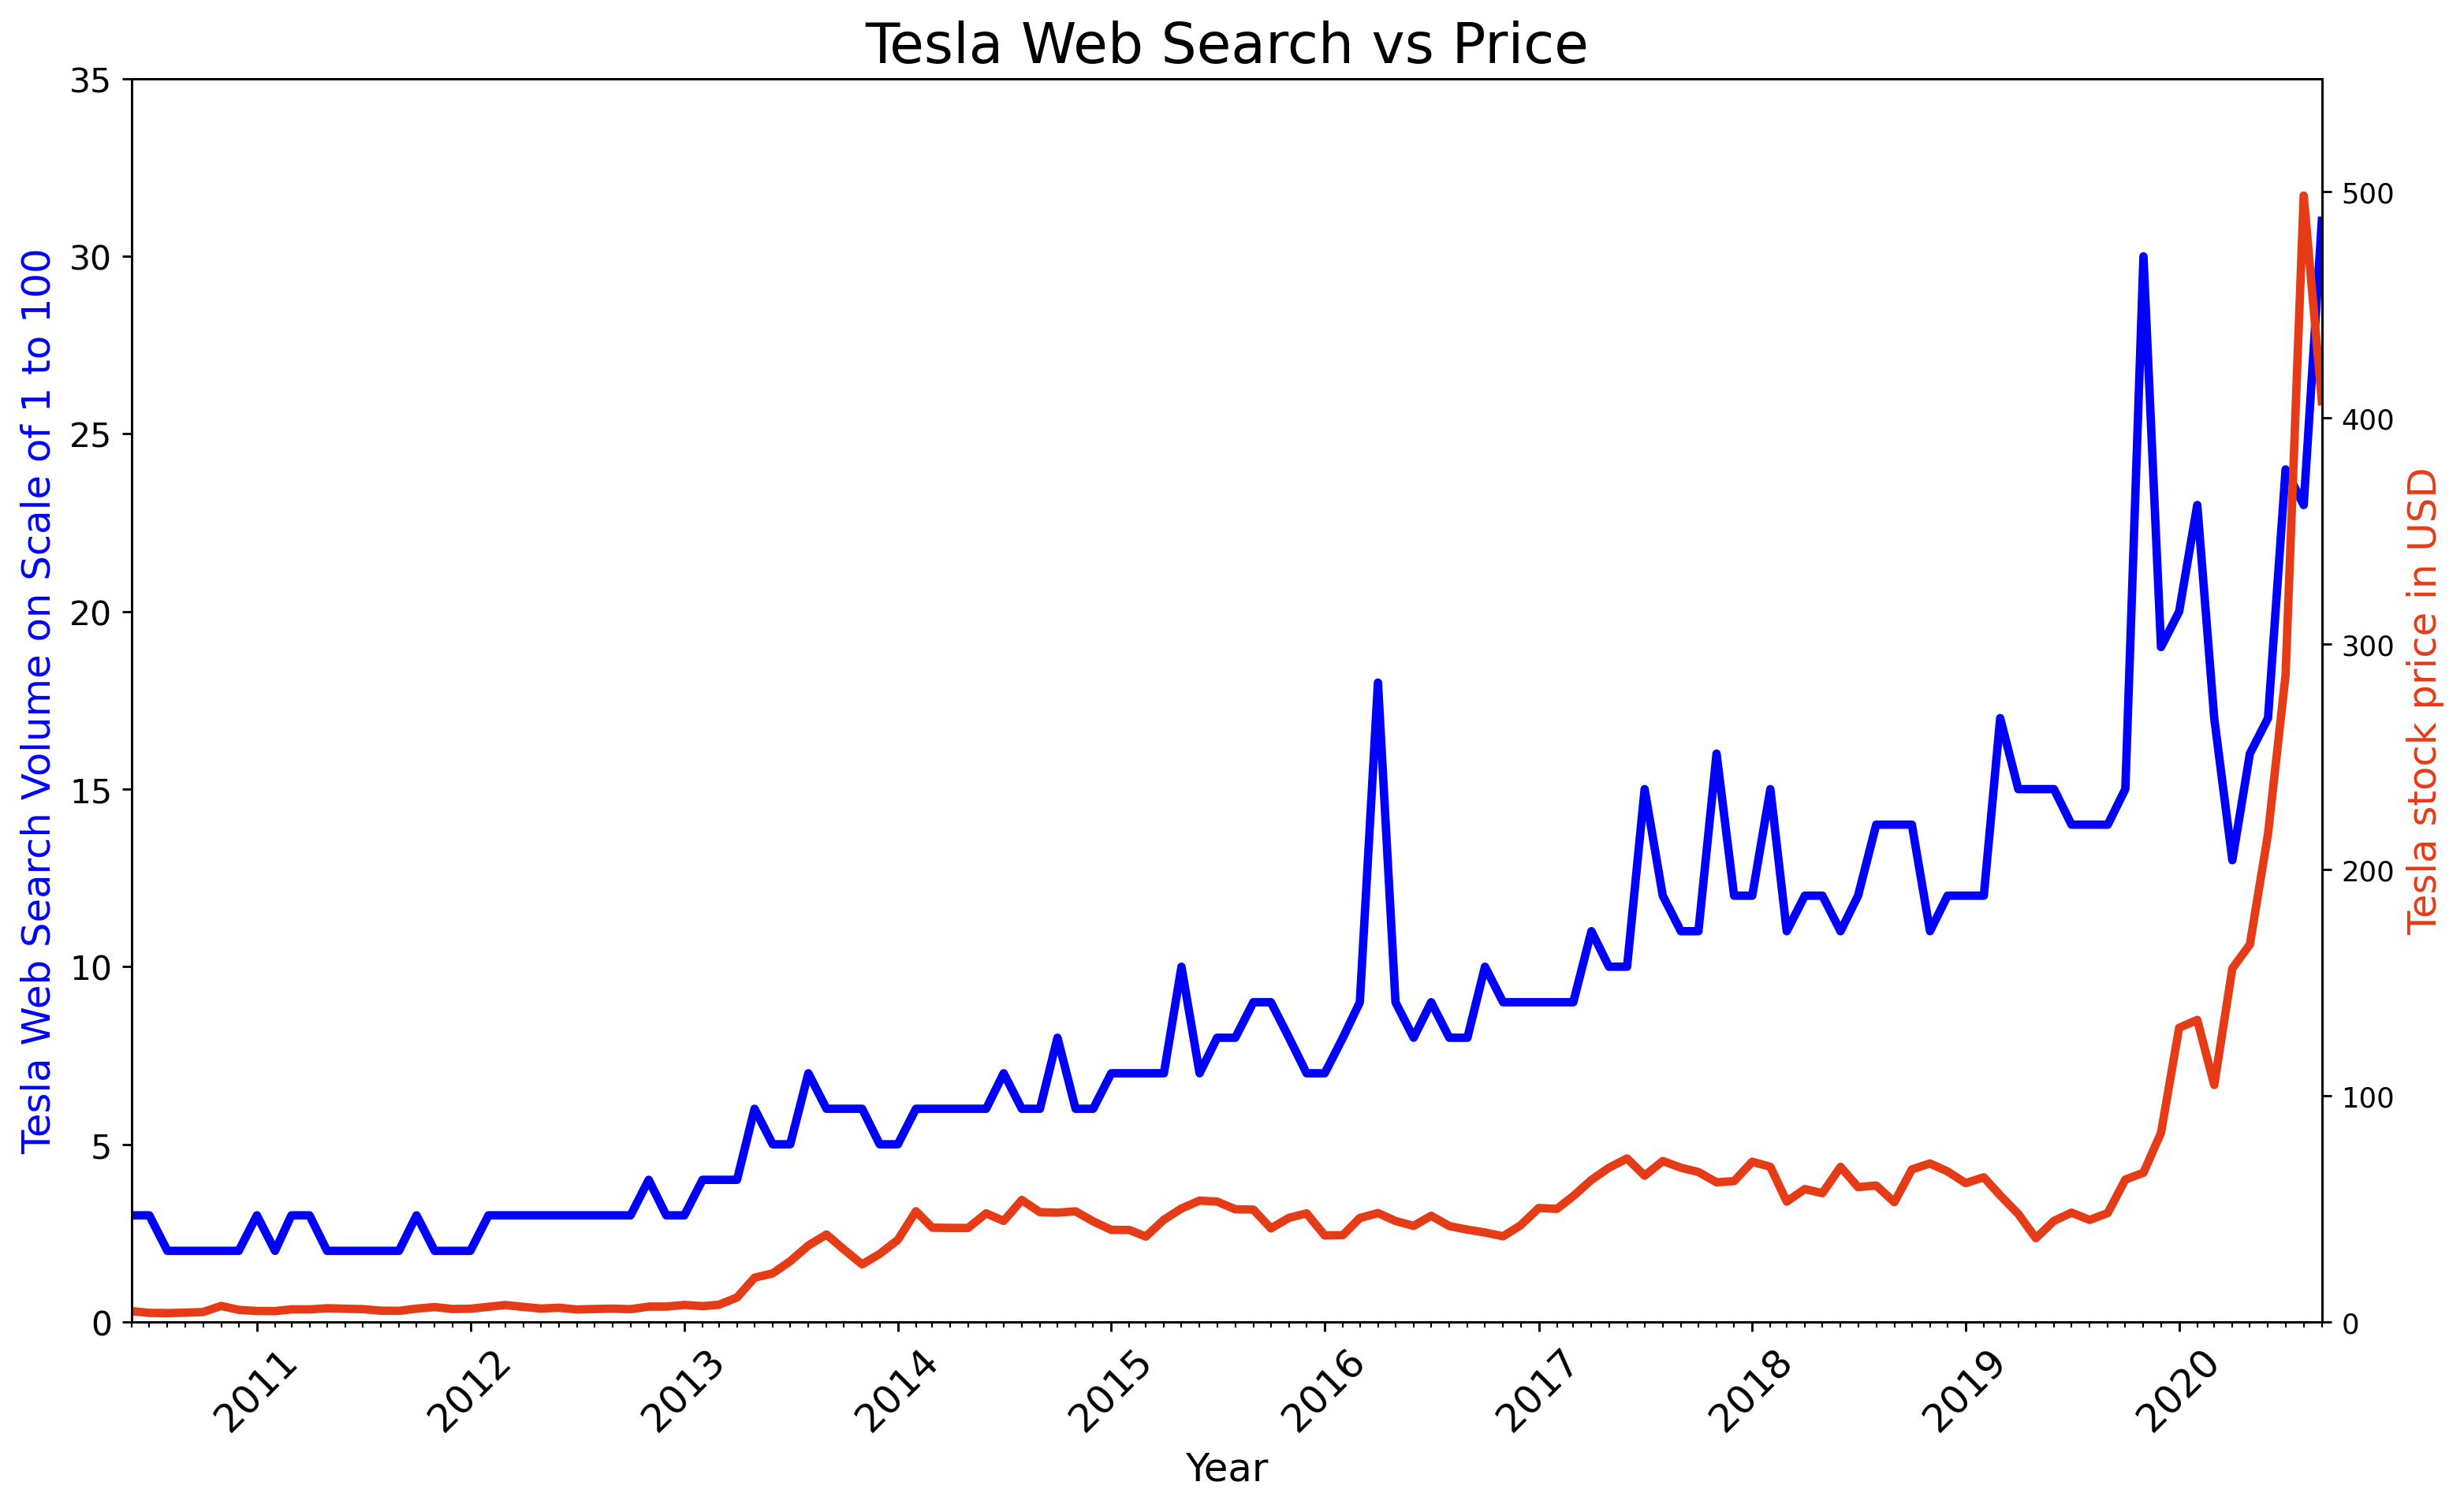

In [100]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_format = mdates.DateFormatter("%Y")
# Create locators for ticks on time-axis
plt.figure(figsize=(14, 8), dpi=256)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.title('Tesla Web Search vs Price', fontsize=20)

ax1 = plt.gca()  # get chart axis
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, "blue", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, "#E53C17", linewidth=3)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

#formatting x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("Tesla Web Search Volume on Scale of 1 to 100", fontsize=14, color="blue")
ax1.set_ylim([0, 35])
ax2.set_ylabel("Tesla stock price in USD", fontsize=14, color="#E53C17")
ax2.set_ylim(0, 550)

# Display chart explicitly
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y axis label to 'BTC Price' <br>
3. Change the y and x axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

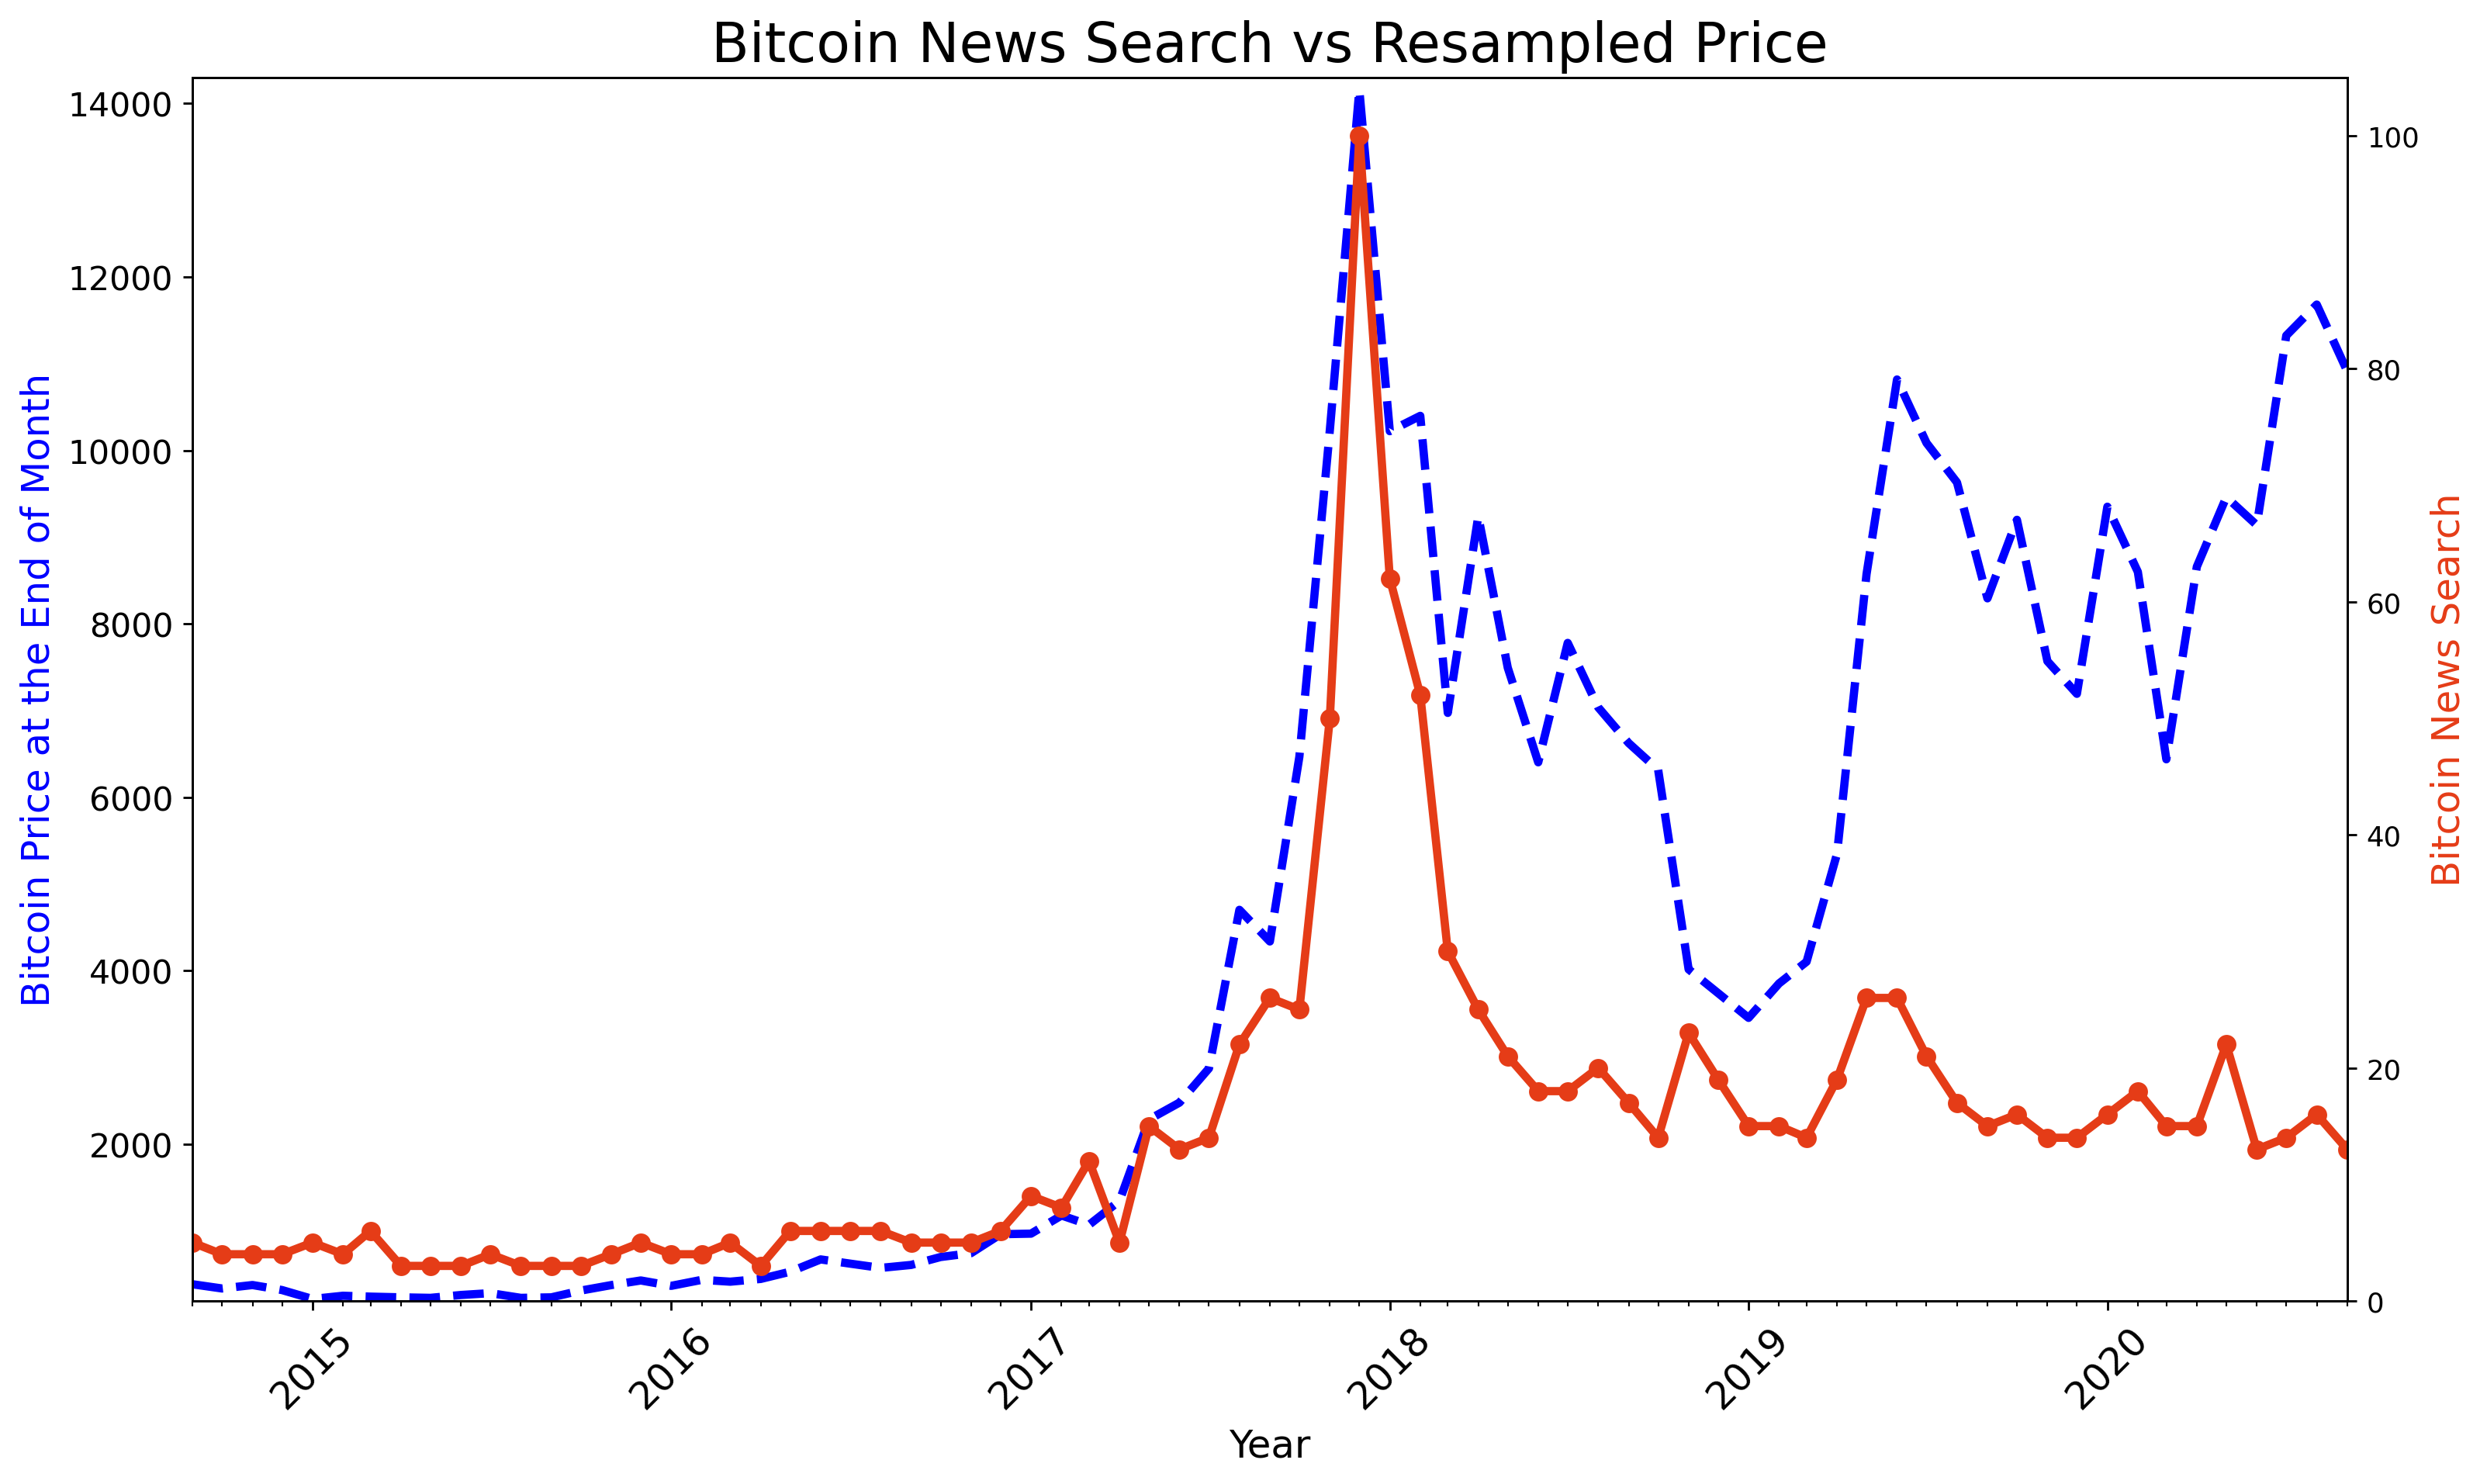

In [109]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_format = mdates.DateFormatter("%Y")
# Create locators for ticks on time-axis
plt.figure(figsize=(14, 8), dpi=256)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=20)

ax1 = plt.gca()  # get chart axis
ax2 = ax1.twinx()

ax1.plot(df_btc_search.MONTH, df_btc_price_monthly.CLOSE, "blue", linewidth=3, linestyle="dashed")
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, "#E53C17", linewidth=3, marker="o")

ax1.set_xlabel("Year", fontsize=14)
ax1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()])

#formatting x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("Bitcoin Price at the End of Month", fontsize=14, color="blue")
ax1.set_ylim([df_btc_price_monthly.CLOSE.min()*0.9, df_btc_price_monthly.CLOSE.max()*1.01])
ax2.set_ylabel("Bitcoin News Search", fontsize=14, color="#E53C17")
ax2.set_ylim([0, 105])

# Display chart explicitly
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style. <br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

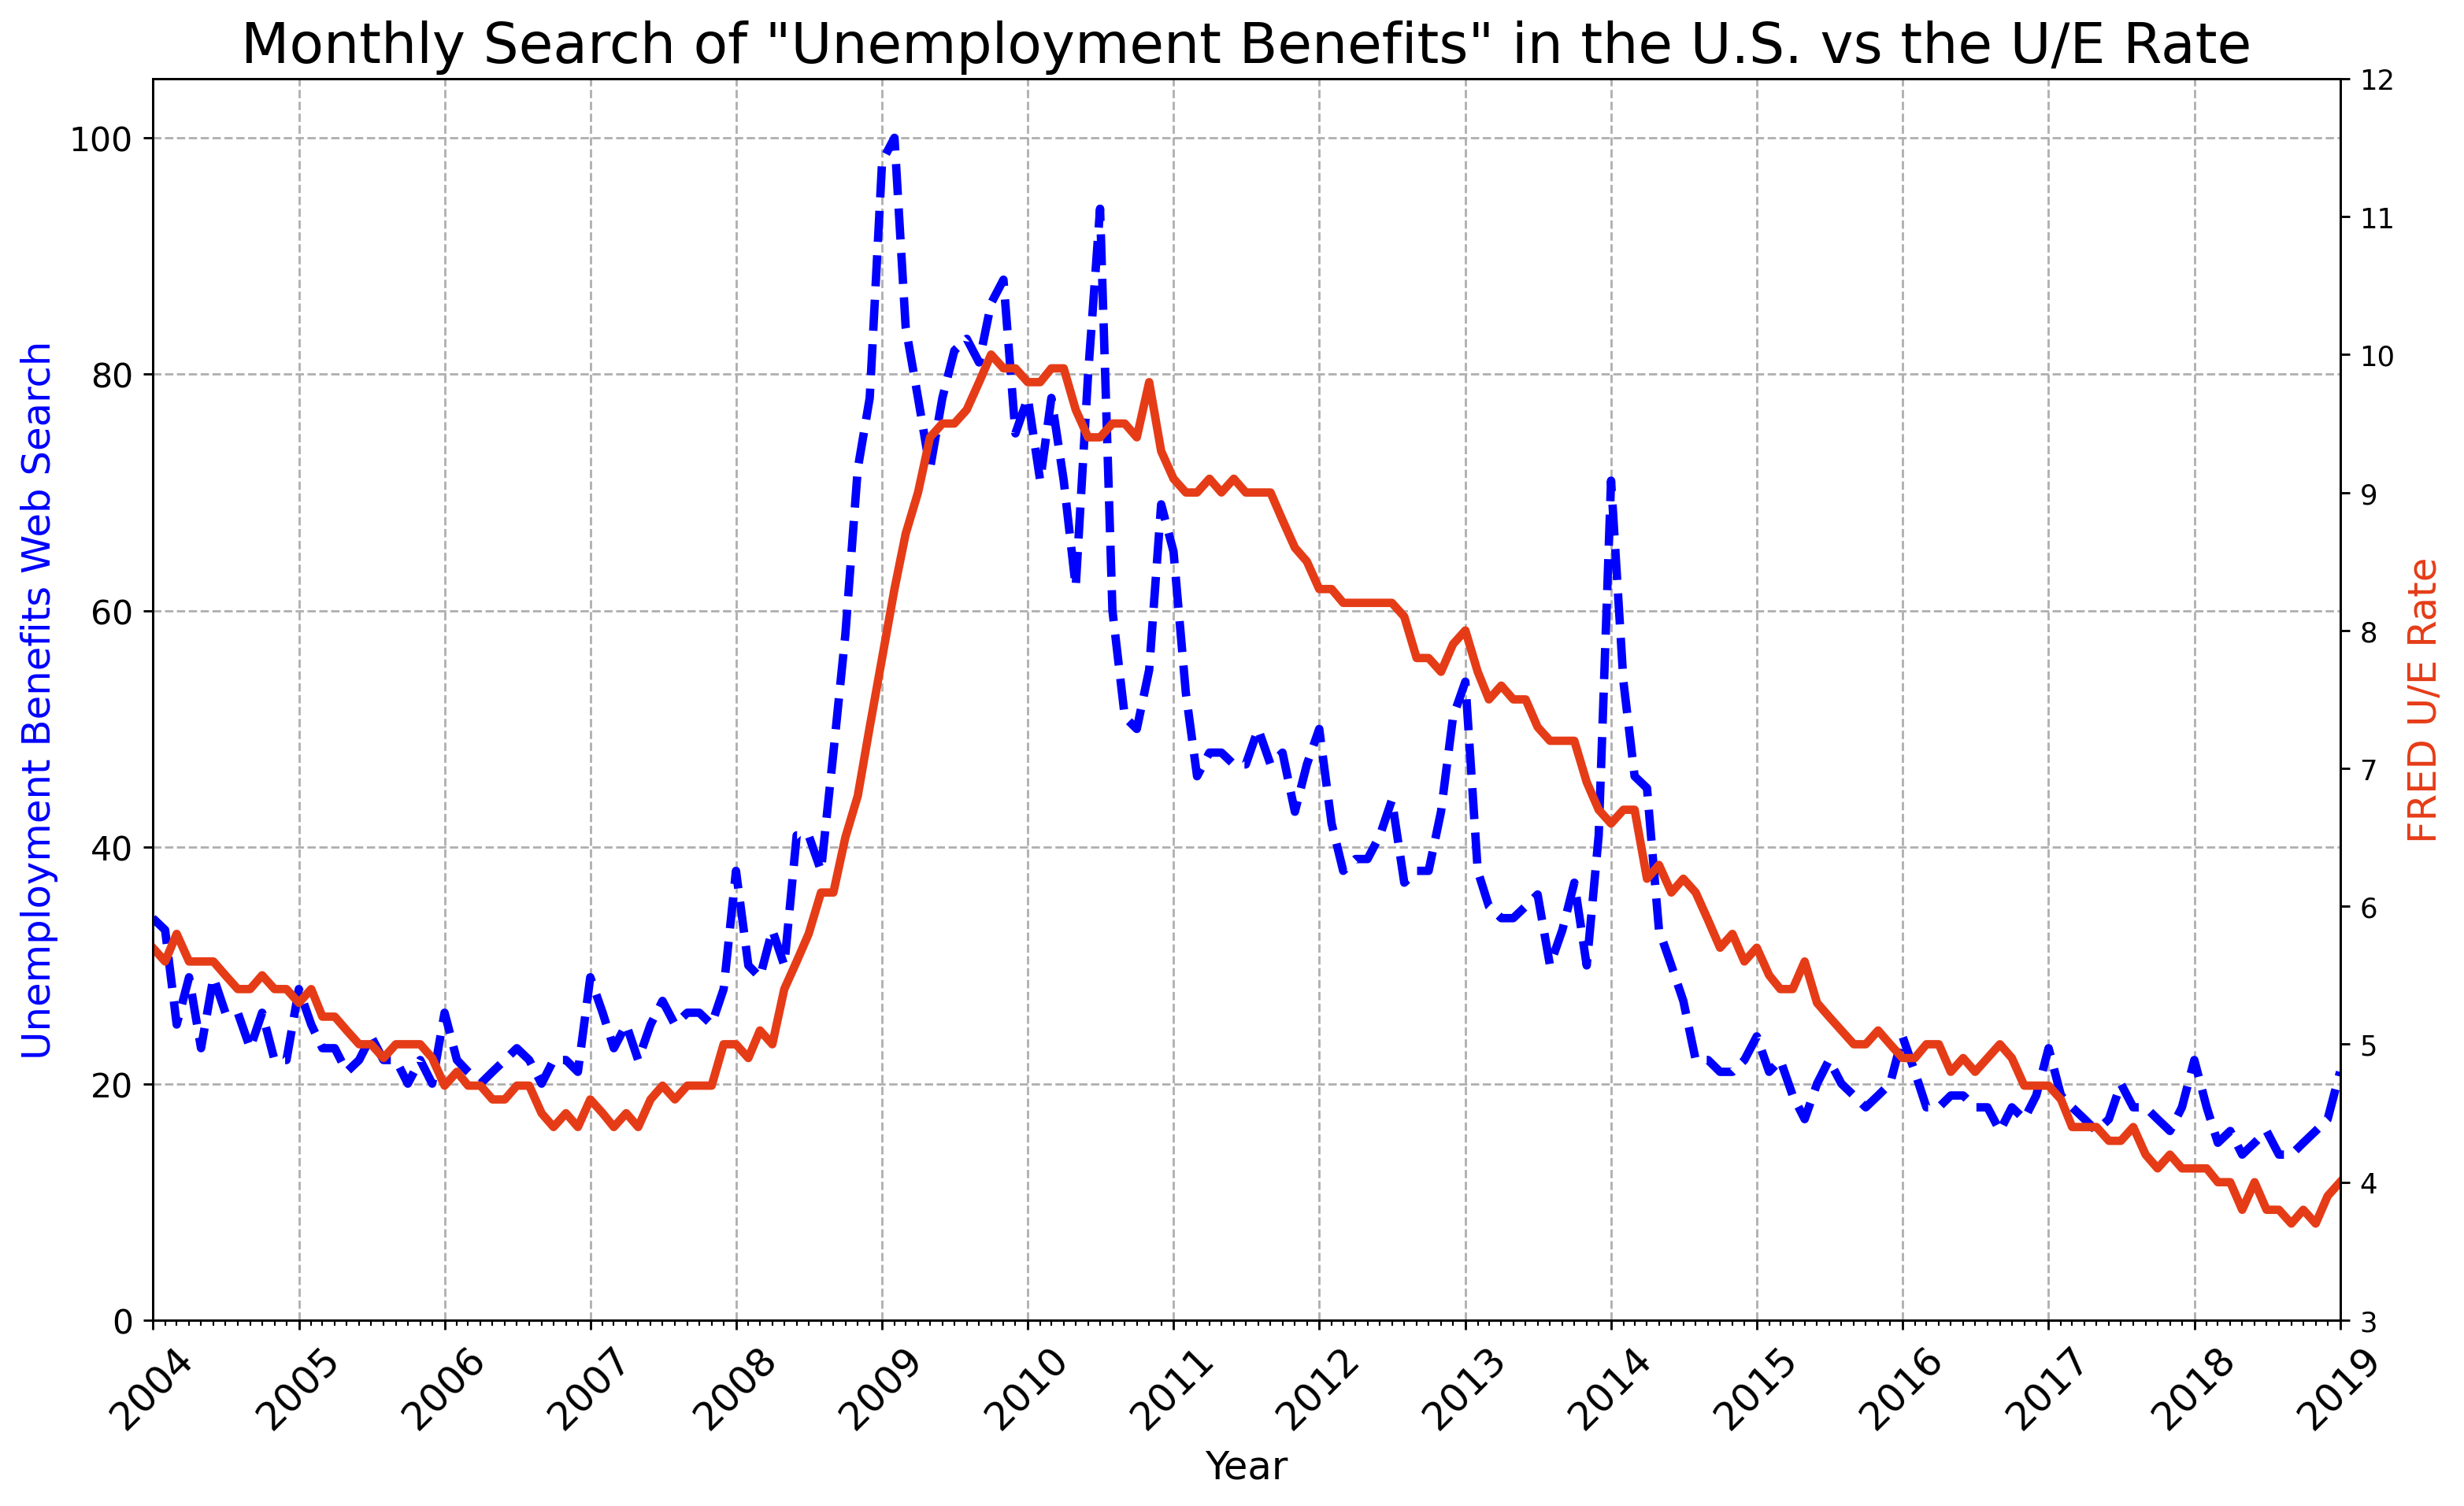

In [125]:
# Create locators for ticks on time-axis
plt.figure(figsize=(14, 8), dpi=256)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=20)

ax1 = plt.gca()  # get chart axis
ax2 = ax1.twinx()

ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, "blue", linewidth=3, linestyle="dashed")
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE, linewidth=3, color="#E53C17")

ax1.set_xlabel("Year", fontsize=14)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.grid(linestyle="dashed")

#formatting x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("Unemployment Benefits Web Search", fontsize=14, color="blue")
ax1.set_ylim([0, 105])
ax2.set_ylabel("FRED U/E Rate", fontsize=14, color="#E53C17")
ax2.set_ylim([3, 12])

# Display chart explicitly
plt.show()

**Challenge**: Calculate the 3-month rolling average for the web searches. Plot the 3-month or 6-month rolling average search data against the actual unemployment. 


In [132]:
# Calculating rolling average of unemployment search data
rolled_3 = df_unemployment.UE_BENEFITS_WEB_SEARCH.rolling(window=3).mean()
rolled_6 = df_unemployment.UE_BENEFITS_WEB_SEARCH.rolling(window=6).mean()
rolled_6

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
176    14.833333
177    14.666667
178    15.000000
179    15.333333
180    16.166667
Name: UE_BENEFITS_WEB_SEARCH, Length: 181, dtype: float64

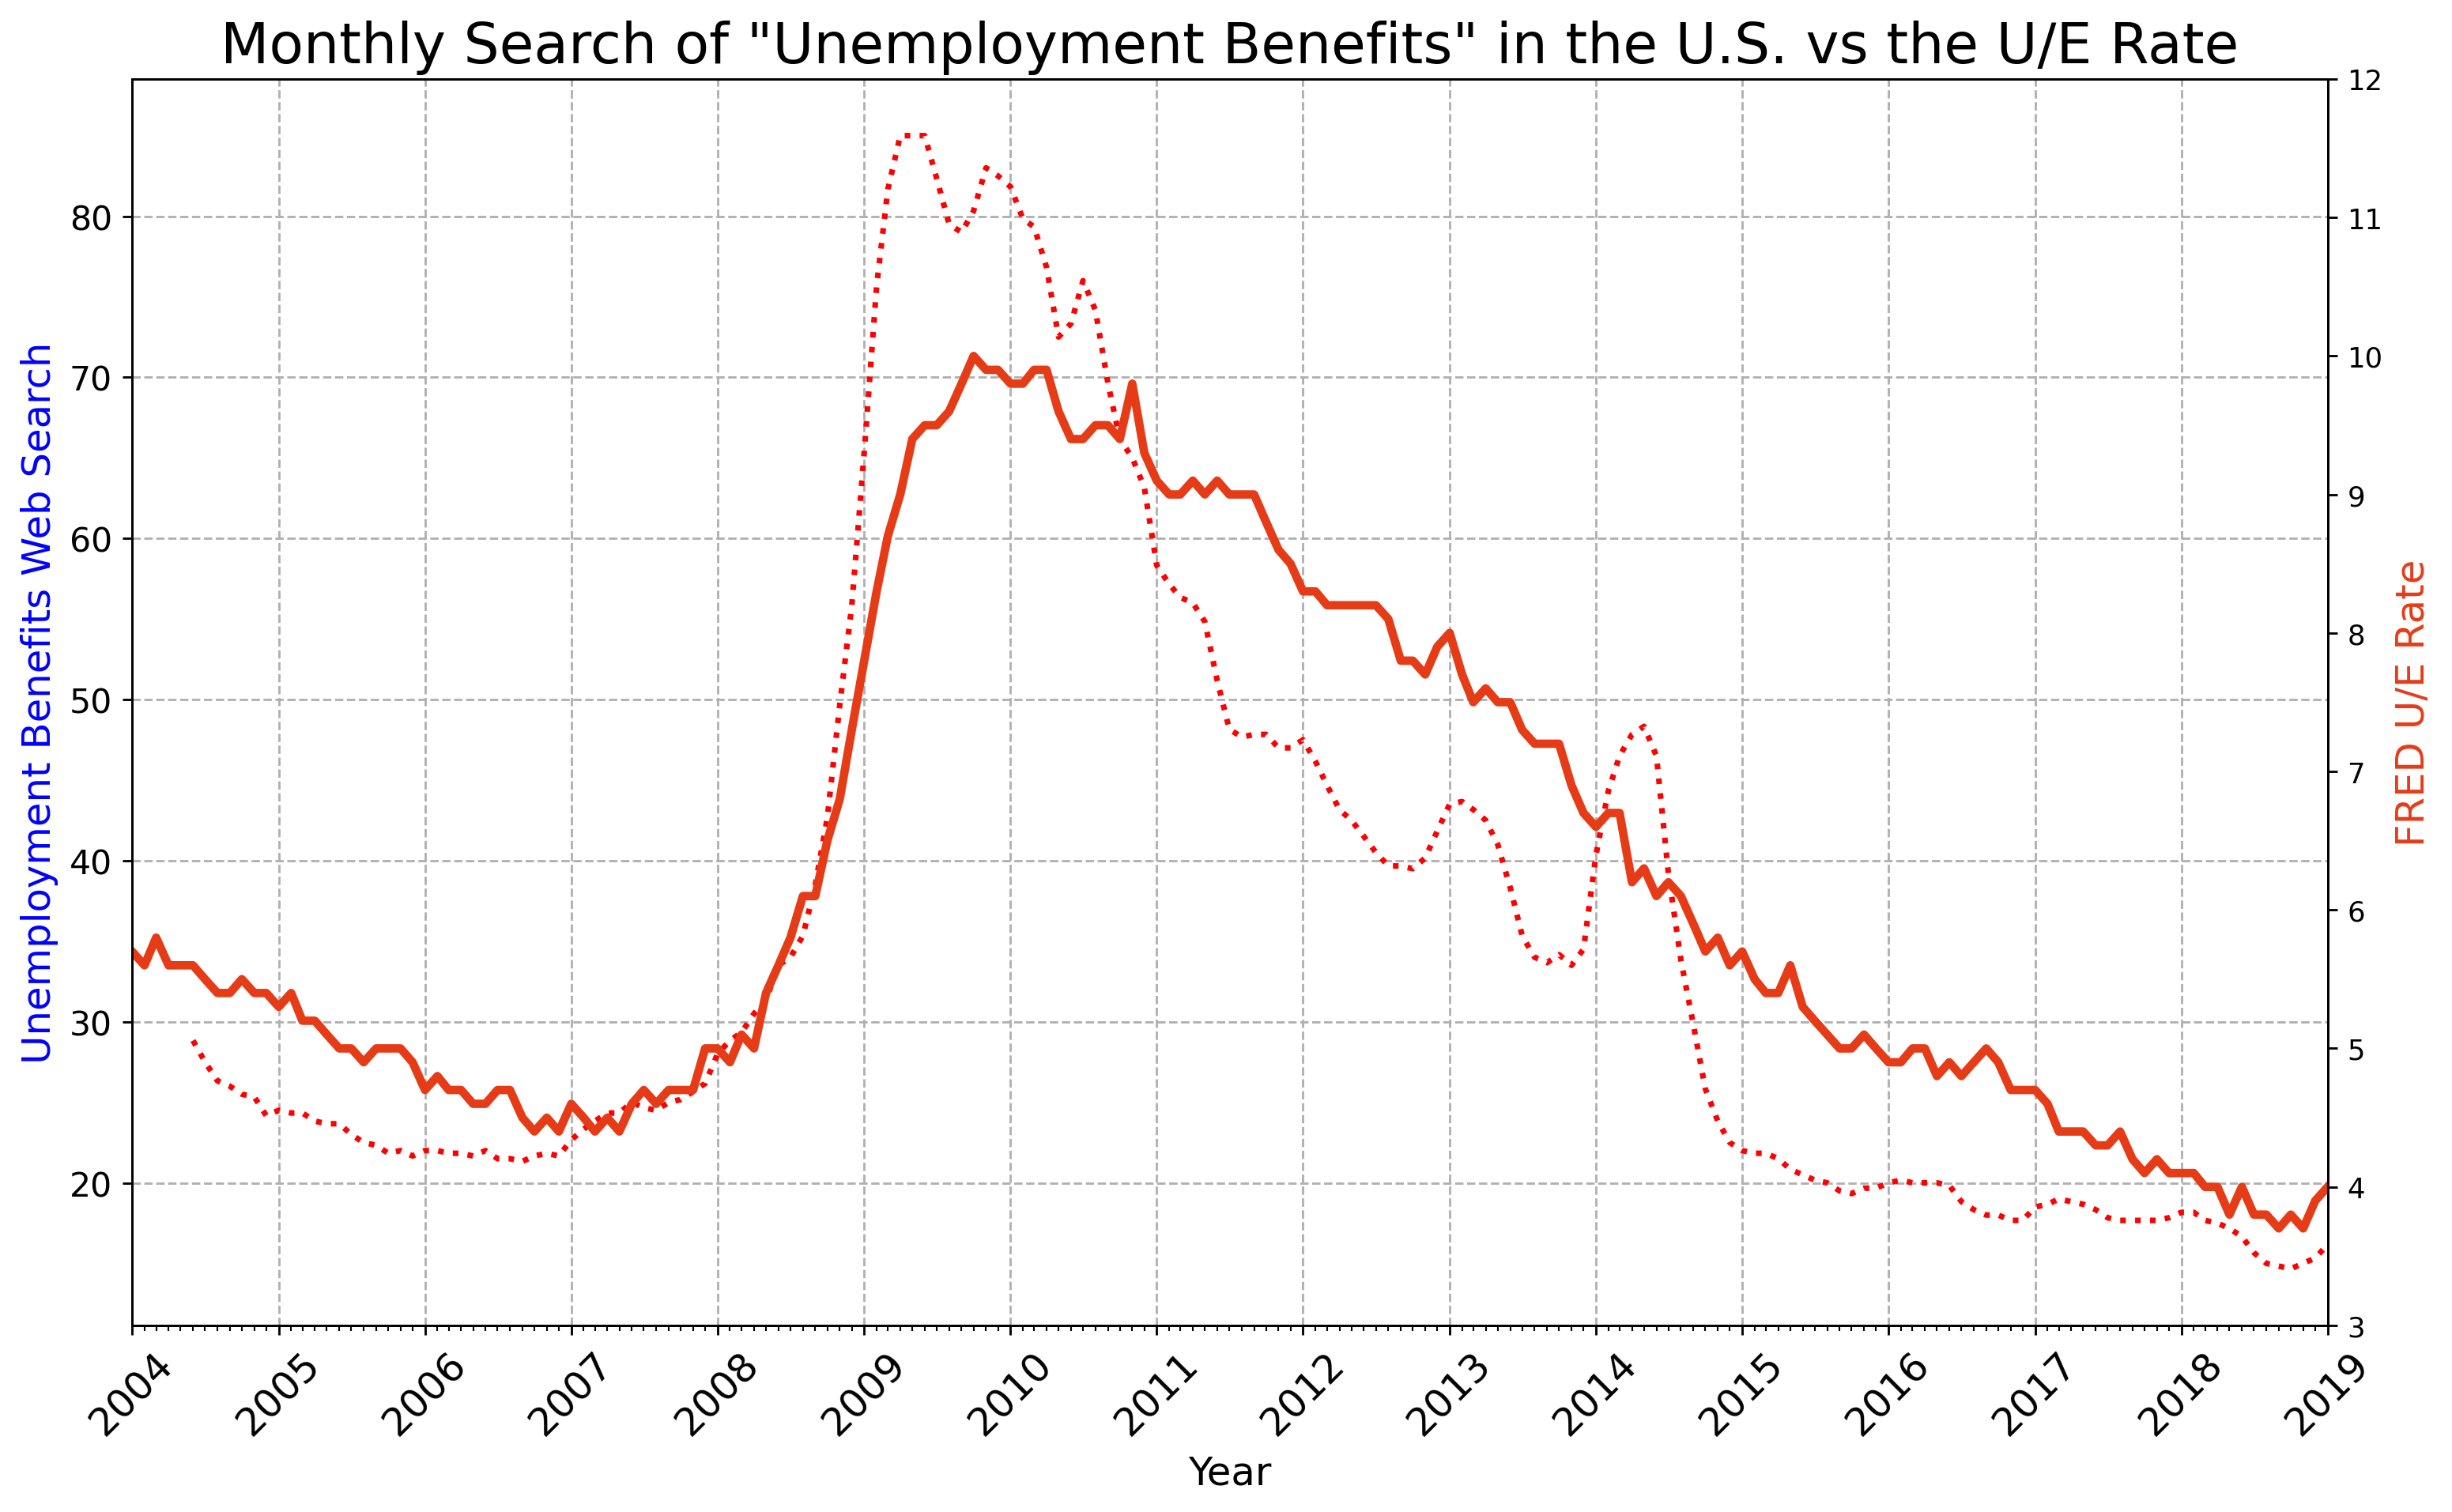

In [138]:
plt.figure(figsize=(14, 8), dpi=256)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=20)

ax1 = plt.gca()  # get chart axis
ax2 = ax1.twinx()

# ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, "blue", linewidth=3, linestyle="dashed")
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE, linewidth=3, color="#E53C17")
# ax1.plot(df_unemployment.MONTH[2:], rolled_3[2:], color="#FFACAC", linewidth=2, linestyle="-.")
ax1.plot(df_unemployment.MONTH[5:], rolled_6[5:], color="red", linewidth=2, linestyle=":")

ax1.set_xlabel("Year", fontsize=14)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.grid(linestyle="dashed")

#formatting x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("Unemployment Benefits Web Search", fontsize=14, color="blue")
ax2.set_ylabel("FRED U/E Rate", fontsize=14, color="#E53C17")
ax2.set_ylim([3, 12])

# Display chart explicitly
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [145]:
ue_data_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
ue_data_2020.MONTH = pd.to_datetime(ue_data_2020.MONTH)

In [146]:
rolled_df = ue_data_2020[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=12).mean()
rolled_df

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
195,15.916667,4.583333
196,20.833333,5.391667
197,24.916667,6.008333
198,29.000000,6.550000


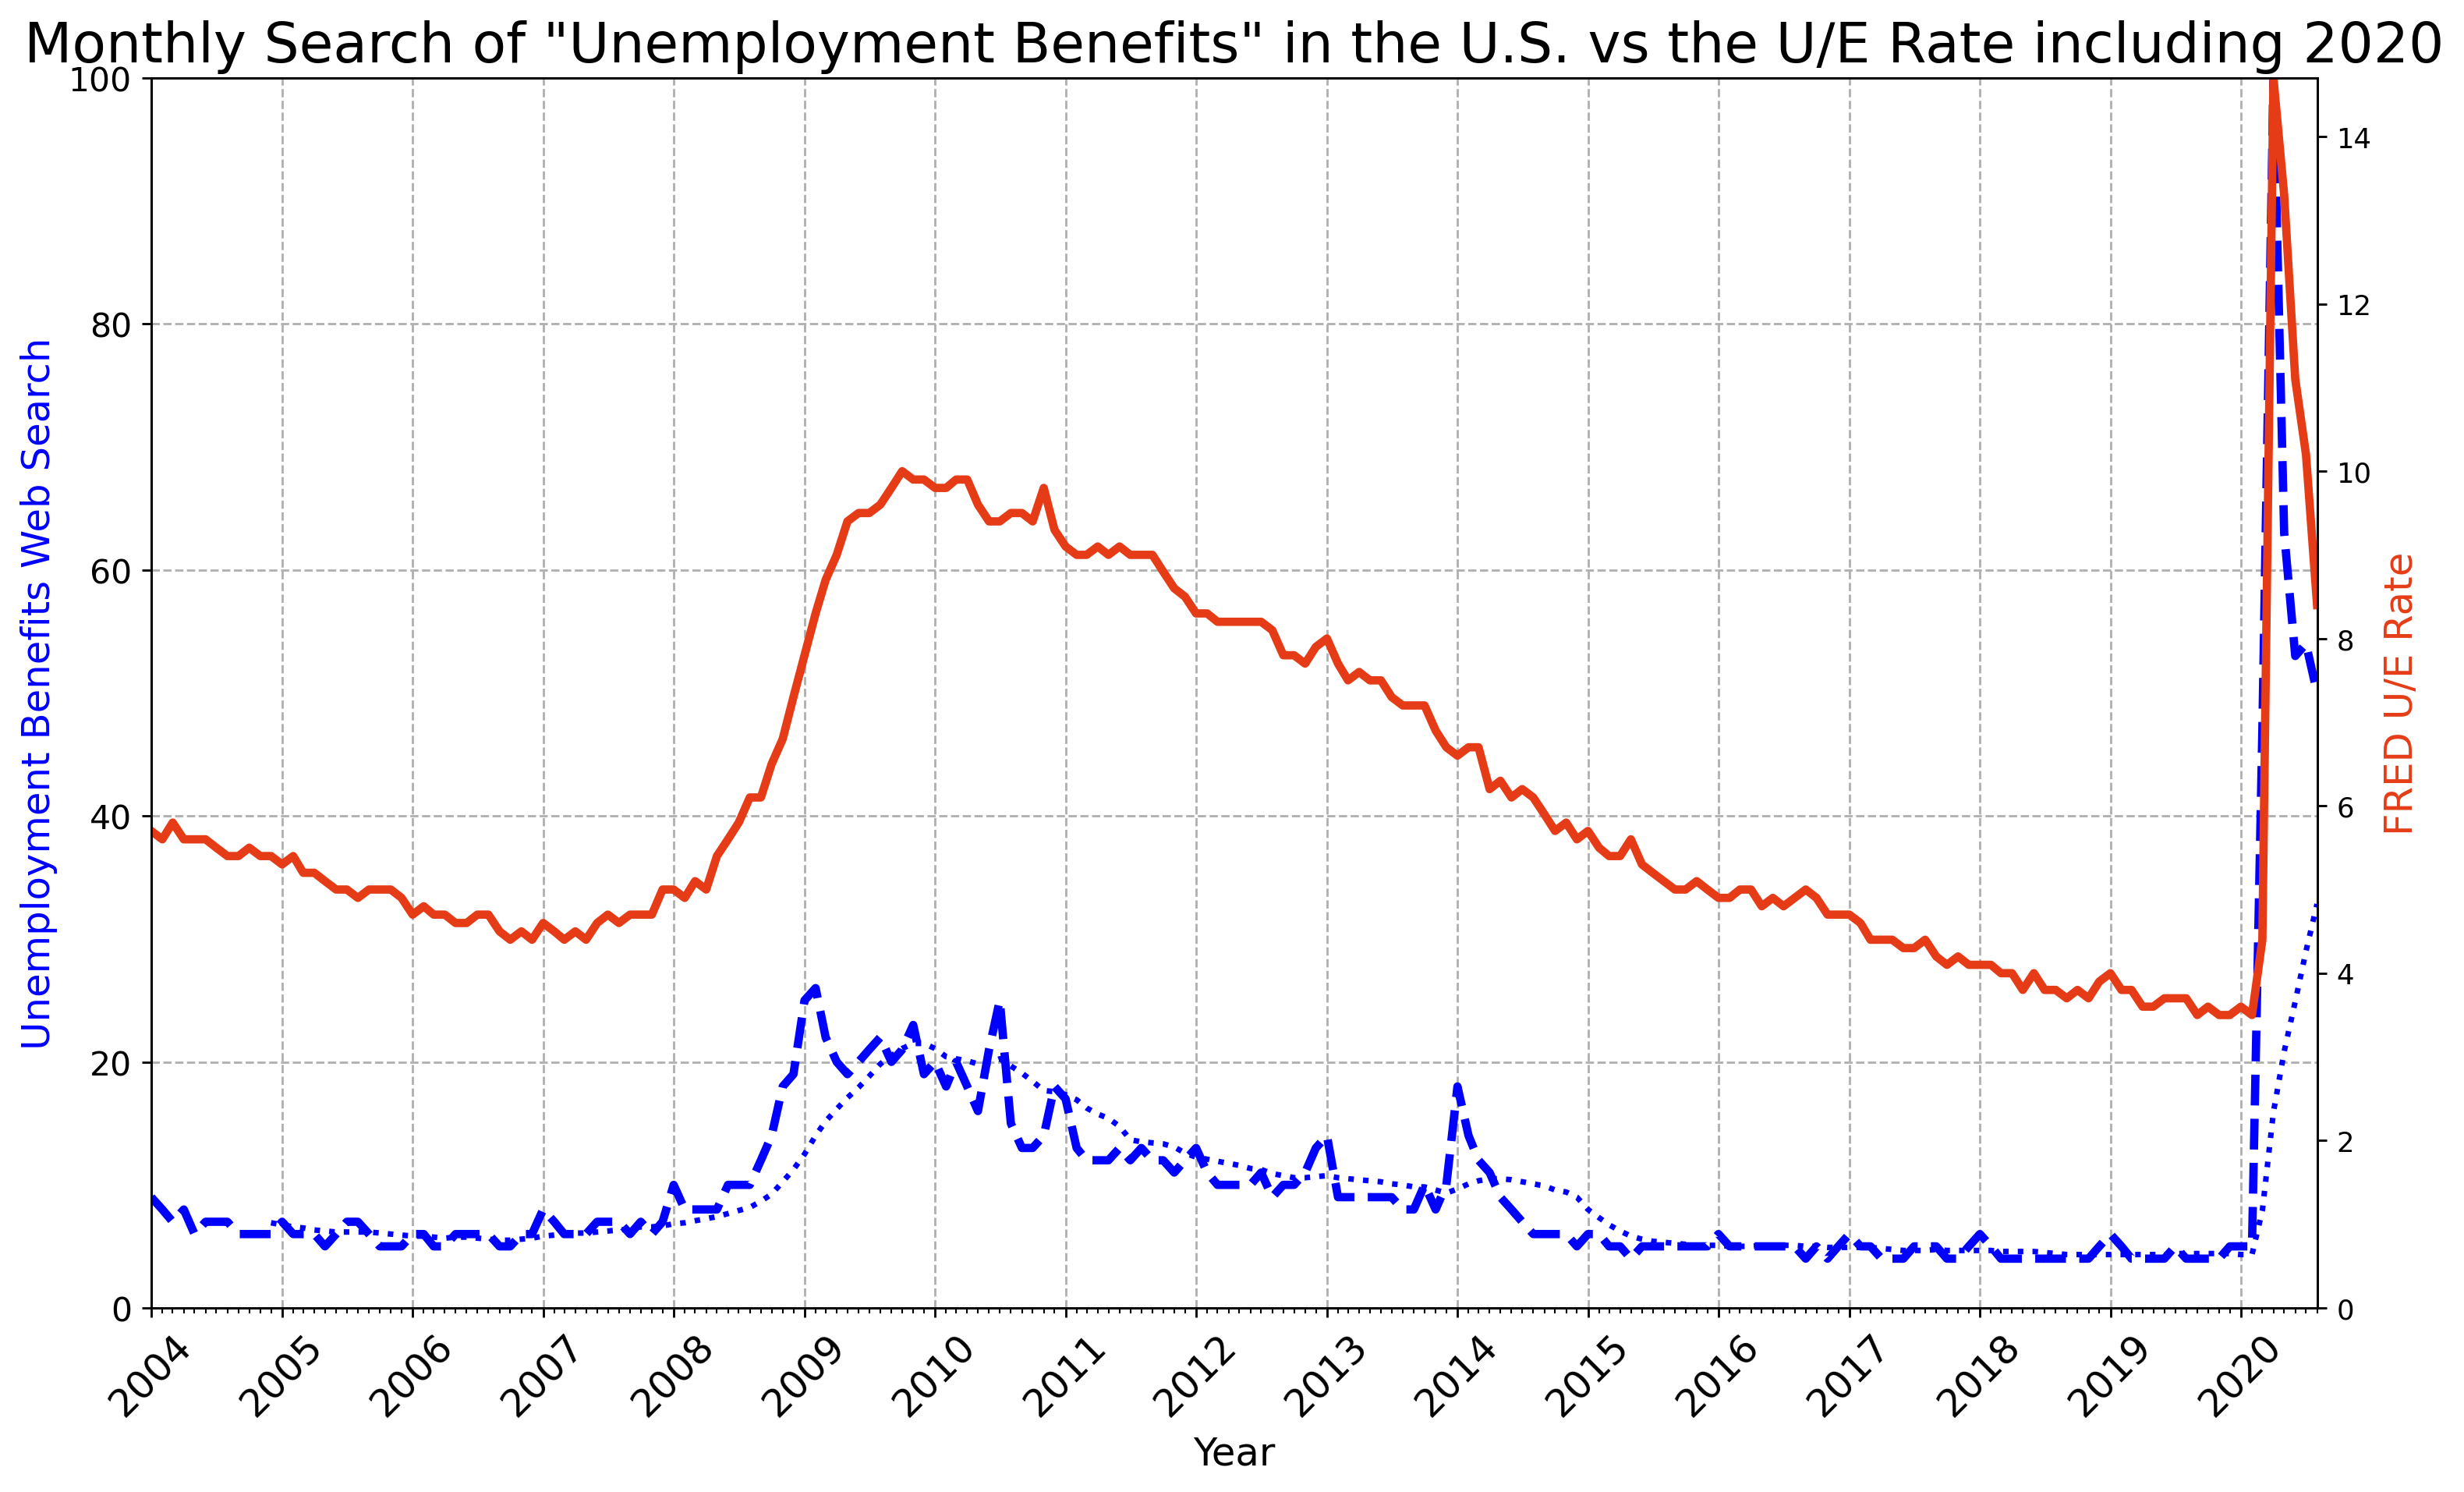

In [155]:
plt.figure(figsize=(14, 8), dpi=256)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=12)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate including 2020', fontsize=20)

ax1 = plt.gca()  # get chart axis
ax2 = ax1.twinx()

ax1.plot(ue_data_2020.MONTH, ue_data_2020.UE_BENEFITS_WEB_SEARCH, "blue", linewidth=3, linestyle="dashed")
ax2.plot(ue_data_2020.MONTH, ue_data_2020.UNRATE, linewidth=3, color="#E53C17")
# ax1.plot(df_unemployment.MONTH[2:], rolled_3[2:], color="#FFACAC", linewidth=2, linestyle="-.")
ax1.plot(ue_data_2020.MONTH, rolled_df.UE_BENEFITS_WEB_SEARCH, color="blue", linewidth=2, linestyle=":")

ax1.set_xlabel("Year", fontsize=14)
ax1.set_xlim([ue_data_2020.MONTH.min(), ue_data_2020.MONTH.max()])
ax1.grid(linestyle="dashed")

#formatting x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("Unemployment Benefits Web Search", fontsize=14, color="blue")
ax2.set_ylabel("FRED U/E Rate", fontsize=14, color="#E53C17")

ax1.set_ylim([0, ue_data_2020.UE_BENEFITS_WEB_SEARCH.max()])
ax2.set_ylim([0, ue_data_2020.UNRATE.max()])

# Display chart explicitly
plt.show()

### Last spike is most likely due to COVID